In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Input_Data = pd.read_csv("/content/drive/MyDrive/Water-Quality-Prediction-using-ML-technique-master/Water-Quality-Prediction-using-ML-technique-master/water_potability.csv")
Input_Data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


<Axes: >

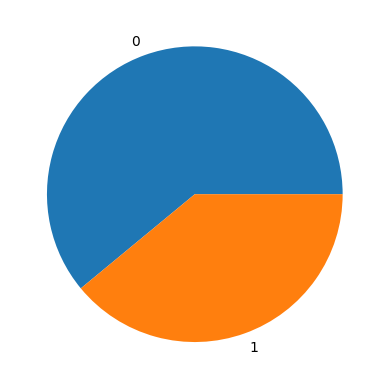

In [ ]:
Input_Data.groupby('Potability').size().plot(kind='pie')

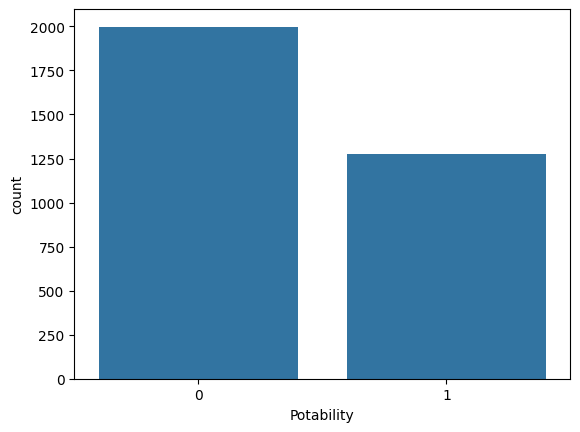

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Potability', data = Input_Data)

# Show the plot
plt.show()

<Axes: xlabel='ph', ylabel='Count'>

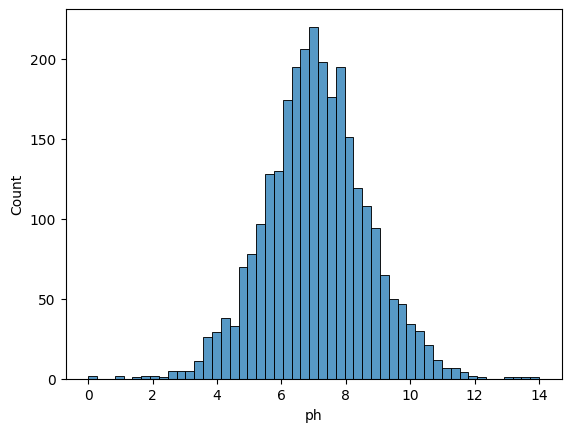

In [ ]:
import seaborn as sns

sns.histplot(data=Input_Data['ph'], kde=False)


<ipython-input-27-7742dbc4ea65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Input_Data['Turbidity'], kde=False)


<Axes: xlabel='Turbidity'>

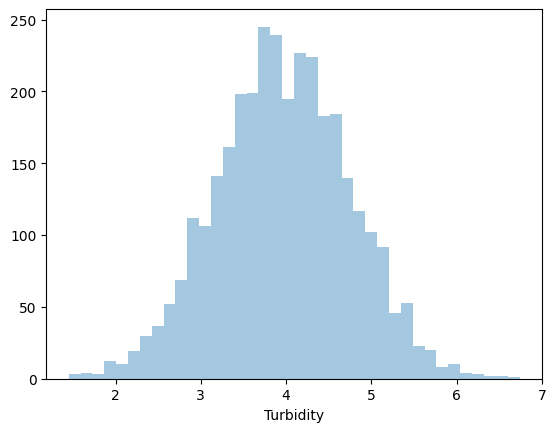

In [ ]:
sns.distplot(a=Input_Data['Turbidity'], kde=False)

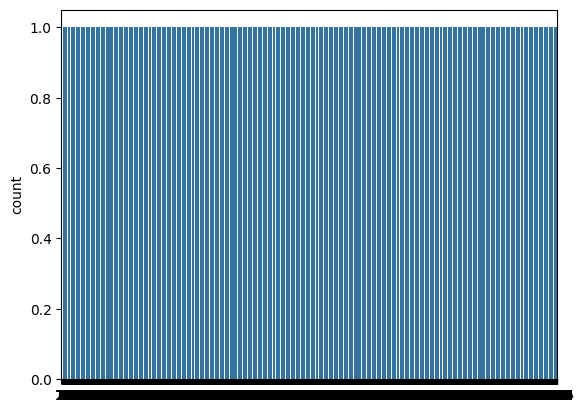

In [ ]:

sns.countplot(Input_Data['Potability'])
plt.show()



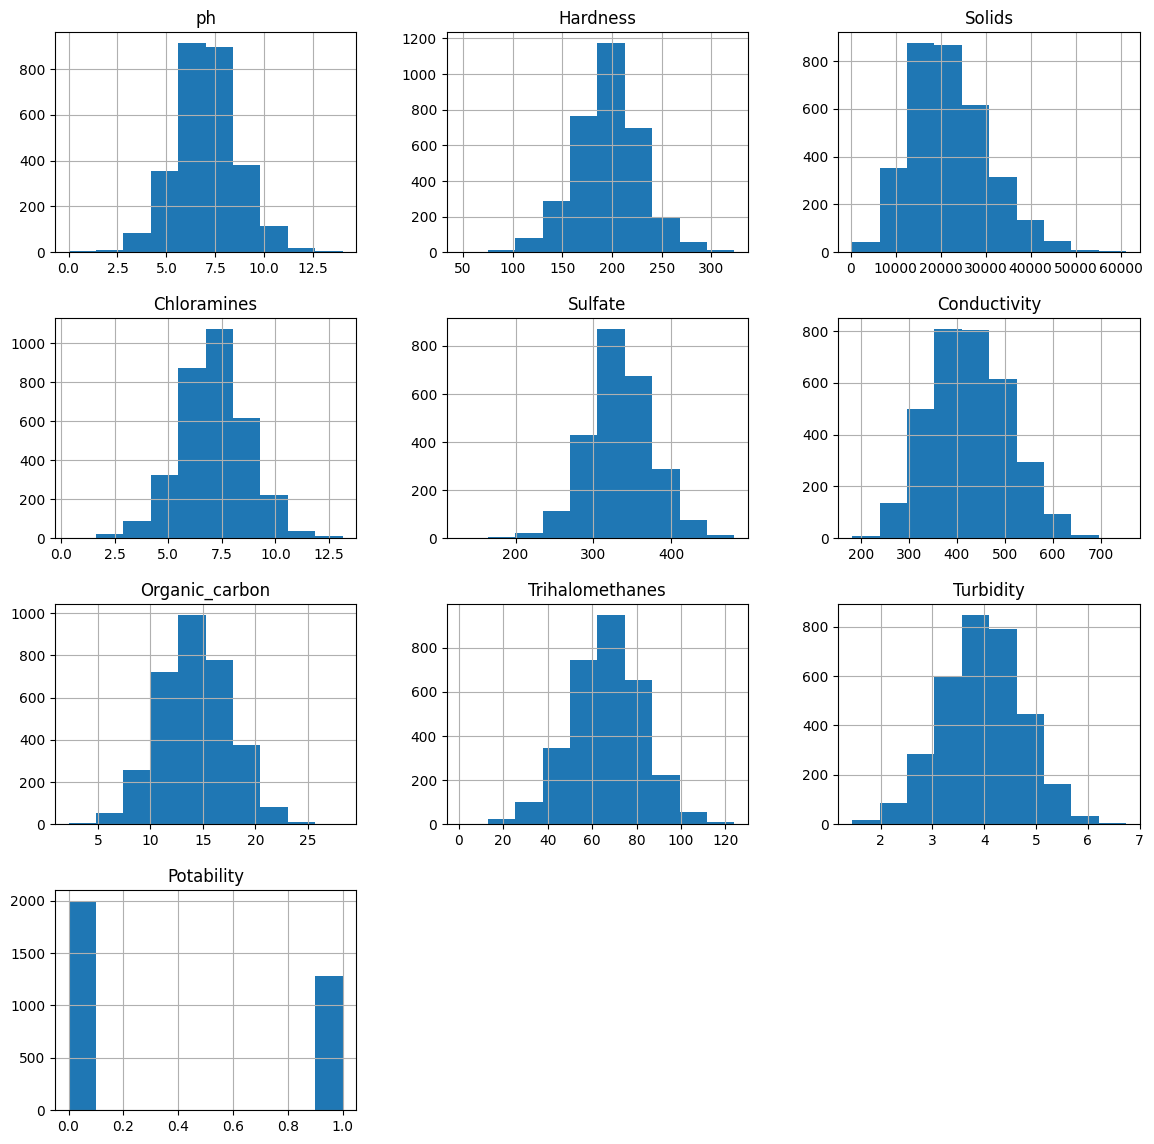

In [ ]:
Input_Data.hist(figsize=(14,14))
plt.show()

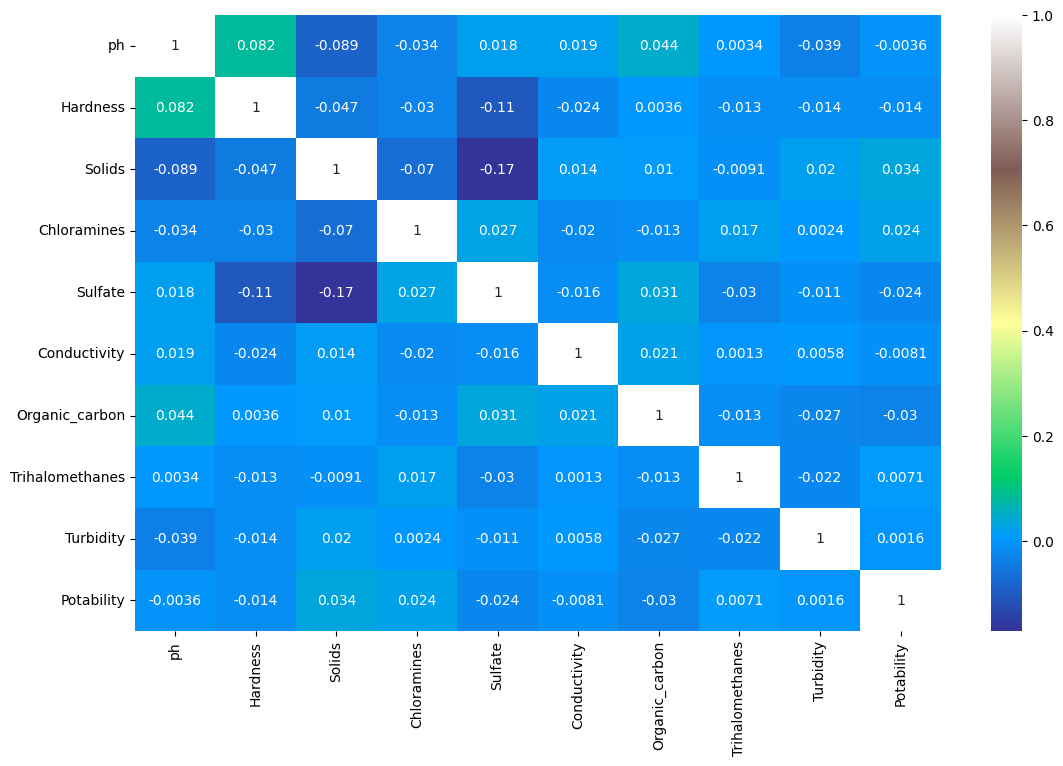

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(Input_Data.corr(),annot=True,cmap='terrain')
plt.show()

<Axes: >

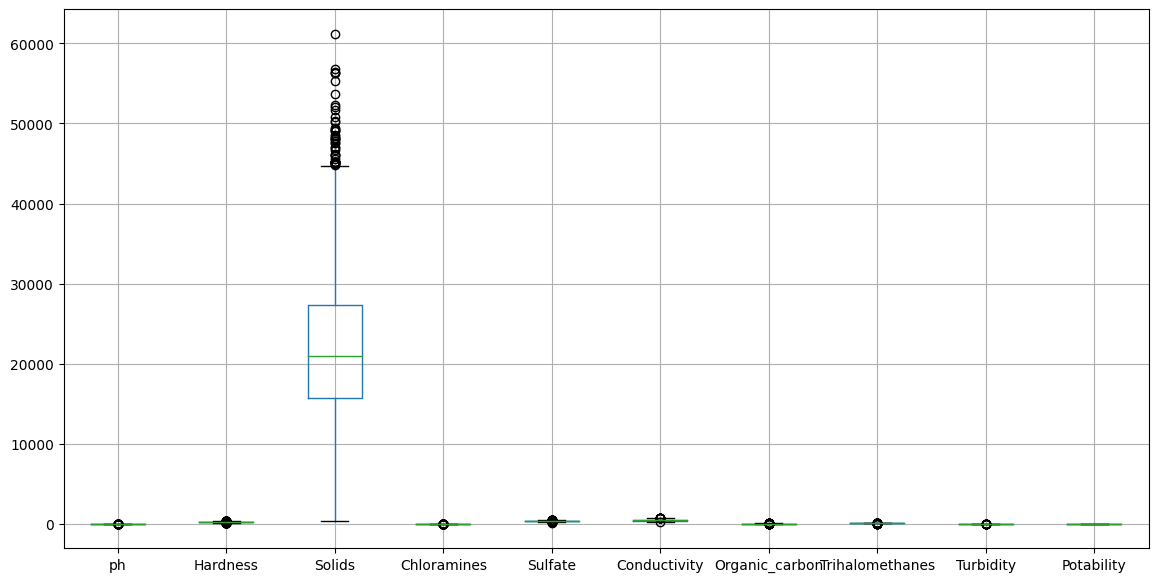

In [ ]:
Input_Data.boxplot(figsize=(14,7))

In [ ]:
import pandas as pd

# Assuming Input_Data is your DataFrame

# Calculate the mean of each numeric column
column_means = Input_Data.mean()

# Iterate over each column
for col in Input_Data.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(Input_Data[col]):
        # Calculate the mean of the column
        col_mean = column_means[col]
        # Replace outliers with the mean
        Input_Data[col] = Input_Data[col].where(
            (Input_Data[col] >= Input_Data[col].quantile(0.25)) &
            (Input_Data[col] <= Input_Data[col].quantile(0.75)),
            col_mean
        )

# Now Input_Data contains the values with outliers replaced by the mean of each respective column


<Axes: >

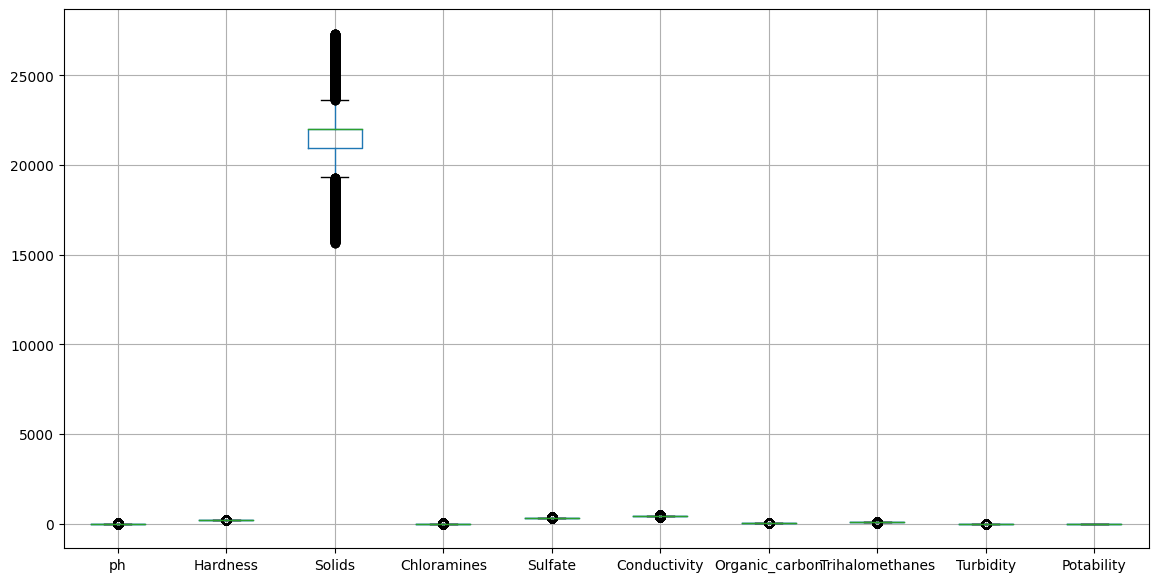

In [ ]:
Input_Data.boxplot(figsize=(14,7))

In [ ]:
Input =Input_Data .drop(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity', 'Potability'],axis =1)

Input

,ph
0,7.080795
1,7.080795
2,7.080795
3,7.080795
4,7.080795
...,...
3271,7.080795
3272,7.808856
3273,7.080795
3274,7.080795


In [ ]:
Output = Input_Data['Potability']
Output

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


RandomForestClassifier(max_depth=10, min_samples_split=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your X_train, X_test, y_train, and y_test defined

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train RandomForestClassifier
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train_imputed, y_train)

# Predict on test set
y_pred_RF = classifier_RF.predict(X_test_imputed)

# Calculate accuracy
Accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(Accuracy_RF)

0.6067073170731707


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have your X_train, X_test, y_train, and y_test defined

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
classifier_RF = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=classifier_RF, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_imputed, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_classifier_RF = RandomForestClassifier(**best_params)
best_classifier_RF.fit(X_train_imputed, y_train)

# Predict on test set
y_pred_RF_tuned = best_classifier_RF.predict(X_test_imputed)

# Calculate accuracy
Accuracy_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
print("Accuracy after hyperparameter tuning:", Accuracy_RF_tuned)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Accuracy after hyperparameter tuning: 0.6082317073170732


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train are your training features and labels
# Assuming X_test, y_test are your test features and labels
# Assuming new_data is your new input data for testing

# Train the Random Forest classifier
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

# Make predictions on the test data
y_pred_RF = classifier_RF.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Model Accuracy of Random Forest Algorithm:", accuracy_RF)
import numpy as np

# Assuming new_data is your new input data
new_data_sample = [[2.120691059]]  # Reshape to a 2D array with a single row

# Make predictions on the new input data
new_data_predictions = classifier_RF.predict(new_data_sample)
new_data_predictions

Model Accuracy of Random Forest Algorithm: 0.6067073170731707


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Make predictions on the new input data
new_data_predictions = classifier_RF.predict(new_data_sample)

# Print the predictions
print("Predictions for new data:", new_data_predictions)

# Print the new data sample
print("New data sample:", new_data_sample)


Predictions for new data: [0]
New data sample: [[2.120691059]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Assuming new_data_sample is your new input data
new_data_sample = np.array([[8.120691059]])  # Assuming a single feature in a 2D array

# Define the lower and upper bounds of the range
lower_bound = 7
upper_bound = 9

# Make predictions based on the range
new_data_predictions = np.where((new_data_sample >= lower_bound) & (new_data_sample <= upper_bound), 1, 0)

# Print the predictions
print("Predictions for new data:", new_data_predictions)



Predictions for new data: [[1]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

In [ ]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test,prediction)*100}")
print("Confusion Matrix =\n", confusion_matrix(y_pred=y_test, prediction))

print(f"Classification Report =\n {classification_report(y_test,prediction)}")


SyntaxError: positional argument follows keyword argument (<ipython-input-52-d9eef17b1f5f>, line 3)